In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

data_path = './Dataset/'
data = pd.read_csv(data_path + 'hour.csv')

# EDA

In [200]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The following columns are instantly removed, because they either possess no ralationship to the data, like, 'instant', or will have very high correlation, in the example of 'casual' and 'registered' these data points if summed make up target variable.

In [201]:
to_drop = ['instant', 'dteday', 'casual', 'registered']

data = data.drop(to_drop, axis=1)

In [202]:
data.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [203]:
data.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [204]:
data.shape

(17379, 13)

In [205]:
data[data.duplicated()].shape[0]

2

In [206]:
data = data.drop_duplicates()

In [207]:
data.shape[0]

17377

## Visualizations

In [208]:
# count_plot = sns.countplot(x='hr', data=data)
# plt.title('Histogram for Hour')
# fig = count_plot.get_figure()
# fig.savefig("hr_countplot.png")

In [209]:
# count_plot = sns.countplot(x='workingday', data=data)
# plt.title('Histogram for Working Day')
# fig = count_plot.get_figure()
# fig.savefig("workingday_countplot.png")

In [210]:
# count_plot= sns.countplot(x='weekday', data=data)
# plt.title('Histogram for Weekday')
# fig = count_plot.get_figure()
# fig.savefig("weekday_countplot.png")

In [211]:
# count_plot = sns.countplot(x='holiday', data=data)
# plt.title('Histogram for Holiday')
# fig = count_plot.get_figure()
# fig.savefig("holiday_countplot.png")

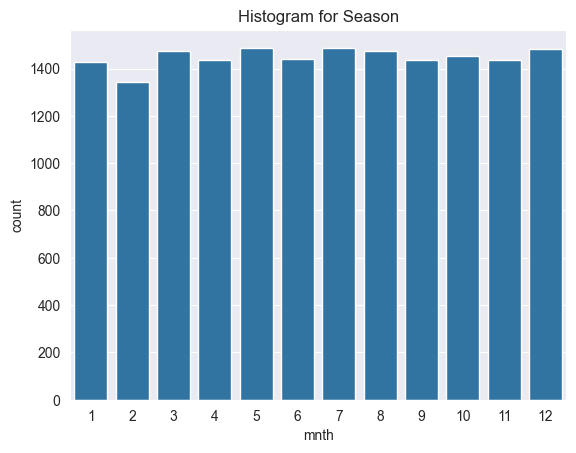

In [212]:
# count_plot =sns.countplot(x='mnth', data=data)
# plt.title('Histogram for Season')
# fig = count_plot.get_figure()
# fig.savefig("season_countplot.png")

In [141]:
# count_plot =sns.countplot(x='windspeed', data=data)
# plt.title('Histogram for Wind speed')
# plt.xticks(rotation=45)
# fig = count_plot.get_figure()
# fig.savefig("windspeed_countplot.png")

In [142]:
# pointplot = sns.pointplot(x='hr', y='cnt', hue='weekday', data=data, palette=sns.cubehelix_palette(n_colors=data.weekday.value_counts().shape[0]))
# plt.title('Count of Bikes taken per Hour based on Weekday')
# fig = pointplot.get_figure()
# fig.savefig("hr_weekday_pointplot.png")

In [143]:
# pointplot =sns.pointplot(x='hr', y='cnt', hue='holiday', data=data, palette=sns.cubehelix_palette(n_colors=data.holiday.value_counts().shape[0]))
# plt.title('Count of Bikes taken per Hour based on Holiday')
# fig = pointplot.get_figure()
# fig.savefig("hr_holiday_pointplot.png")

In [144]:
# pointplot = sns.pointplot(x='hr', y='cnt', hue='weathersit', data=data, palette=sns.cubehelix_palette(n_colors=data.weathersit.value_counts().shape[0]))
# plt.title('Count of Bikes taken per Hour bassed on Weather situation')
# fig = pointplot.get_figure()
# fig.savefig("hr_weathersit_pointplot.png")

In [145]:
# pointplot = sns.pointplot(y='cnt', x='mnth', hue='weathersit', data=data)
# plt.title('Count of Bikes taken per Month in each Weather situation')
# fig = pointplot.get_figure()
# fig.savefig("mnth_weathersit_pointplot.png")

In [146]:
# pointplot = sns.pointplot(x='mnth', y='cnt', hue='yr', data=data)
# plt.title('Count of Bikes taken based Month each Year')
# fig = pointplot.get_figure()
# fig.savefig("mnth_yr_pointplot.png")

In [147]:
# pointplot = sns.pointplot(x='windspeed', y='cnt', data=data)
# plt.title('Count of Bikes based on Wind speed')
# plt.xticks(rotation=45)
# fig = pointplot.get_figure()
# fig.savefig("windspeed_pointplot.png")

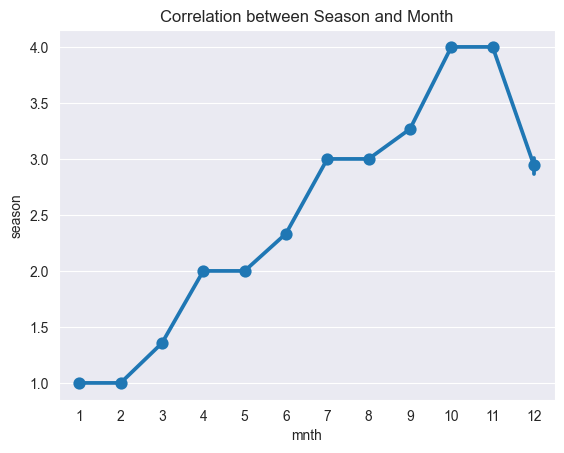

In [148]:
# pointplot = sns.pointplot(x='mnth', y='season', data=data)
# plt.title('Correlation between Season and Month')
# fig = pointplot.get_figure()
# fig.savefig('Correlation_season_month.png')

## Variable Boxplots

In [149]:
# float_features = ['temp', 'hum', 'windspeed', 'atemp']

In [150]:
# data_long = data.loc[:,float_features].melt()
# ax = sns.boxplot(data=data_long, x="value", y="variable", orient="h", hue="variable")
# plt.title('Box Plot for Each Real Value Variable')
# plt.tight_layout()
# plt.savefig("boxplot.png")
# plt.show()

In [151]:
# print(f"Percentage of variable humidity outliers: {data[data['hum'] <0.08].shape[0]/data.shape[0] * 100:.3f}%")
# print(f"Percentage of variable windspeed outliers: {data[data['windspeed'] >=0.5].shape[0]/data.shape[0] * 100:.3f}%")

In [152]:
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(data[column] >= upper)[0]
    lower_array = np.where(data[column] <= lower)[0]

    print(f'Old shape with {column}: {data.shape[0]}')

    # Removing the outliers
    data =data.drop(index=upper_array, inplace=False)
    data = data.drop(index=lower_array, inplace=False)

    # Print the new shape of the DataFrame
    print(f'New shape with {column}: {data.shape[0]}')

    return data

data = remove_outliers(data, 'hum')
data = remove_outliers(data, 'windspeed')

Old shape with hum: 17377
New shape with hum: 17355
Old shape with windspeed: 17355
New shape with windspeed: 17014


## Correlation matrix

In [153]:
# corr = data.loc[:,data.columns!='cnt'].corr(method="pearson")
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# 
# heatmap = sns.heatmap(
#     corr,
#     mask = mask,
#     vmax=1,
#     center=0,
#     annot=True,
#     fmt='.1f',
#     square=True,
# )
# plt.title('Correlation Heatmap')
# fig = heatmap.get_figure()
# fig.savefig("heatmap.png", bbox_inches='tight')

In [154]:
# corr_matrix = round(data.corr(),2)
# print(np.abs(corr_matrix['cnt']).sort_values(ascending=False))

In [155]:
# plt.figure(figsize=(100, 100))
# sns.pairplot(data, x_vars=['hr','temp','atemp', 'hum','windspeed'], y_vars='cnt')
# plt.title('Scatter Plot on Target Variable')
# plt.savefig("pairplot.png", bbox_inches='tight')
# plt.show()

From correlation matrix it can be seen that there are dependent variables, which should be removed, like
temp and atemp


In [156]:
# print(np.corrcoef(data['season'], data['cnt']))
# 
# print(np.corrcoef(data['mnth'], data['cnt']))
# 
# print(np.corrcoef(data['windspeed'], data['cnt']))

In [157]:
def one_hot_encoder(df,column):
    df = pd.concat([df,pd.get_dummies(df[column],prefix=column, dtype=int)],axis=1)
    df = df.drop(columns = [column],axis=1)
    return df

ohe_columns = ['hr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in ohe_columns:
    data[col] = data[col].astype('category')


for col in ohe_columns:
    data = one_hot_encoder(data,col)

In [158]:
data.head()

,season,yr,temp,atemp,hum,windspeed,cnt,hr_0,hr_1,hr_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,0.24,0.2879,0.81,0.0,16,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1,1,0,0.22,0.2727,0.80,0.0,40,0,1,0,...,0,0,0,1,1,0,1,0,0,0
2,1,0,0.22,0.2727,0.80,0.0,32,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,1,0,0.24,0.2879,0.75,0.0,13,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,1,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


# Model Training

In [159]:
### Custom format MSE
def rmse(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(np.mean((y-y_pred)**2))

def rmse(y, y_pred):
    return np.sqrt(np.mean((y-y_pred)**2))

In [160]:
y = data.pop('cnt')

X = data.drop(columns=['temp'],axis=1)

In [161]:
X.shape

(17014, 56)

In [162]:
X.columns

Index(['season', 'yr', 'atemp', 'hum', 'windspeed', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [164]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [165]:
rmse_score_lr = rmse(y_test, y_pred)

print(f'Root mean squared error score: {rmse_score_lr:.3f}')

Root mean squared error score: 102.358


In [166]:
r2_score_lr = r2_score(y_test, y_pred)

print(f'R2 score: {r2_score_lr:.3f}')

R2 score: 0.677


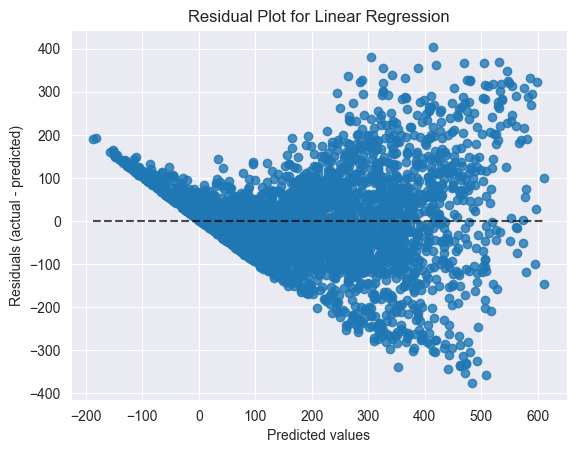

In [167]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.title("Residual Plot for Linear Regression")
plt.savefig("residual_plot_lr.png")
plt.show()

In [168]:
zipp = zip(X.columns, np.round(np.abs(lr.coef_),2))
zipp_df = pd.DataFrame(zipp)

zipp_df.sort_values(by=1, ascending=False).head(10)

,0,1
33,mnth_5,2.043314e+13
37,mnth_9,2.043314e+13
32,mnth_4,2.043314e+13
31,mnth_3,2.043314e+13
34,mnth_6,2.043314e+13
38,mnth_10,2.043314e+13
36,mnth_8,2.043314e+13
30,mnth_2,2.043314e+13
29,mnth_1,2.043314e+13
40,mnth_12,2.043314e+13


### Applying Standardization to columns with real data values

In [169]:
scaler = StandardScaler()

X_train_scaled = X_train.copy(deep=True)
X_test_scaled = X_test.copy(deep=True)

X_train_scaled['atemp'] = scaler.fit_transform(np.asarray(X_train['atemp']).reshape(-1, 1))
X_test_scaled['atemp'] = scaler.fit_transform(np.asarray(X_test['atemp']).reshape(-1, 1))

X_train_scaled['hum'] = scaler.fit_transform(np.asarray(X_train['hum']).reshape(-1, 1))
X_test_scaled['hum'] = scaler.fit_transform(np.asarray(X_test['hum']).reshape(-1, 1))

In [170]:
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [171]:
rmse_score_lr_scaled = rmse(y_test, y_pred)

print(f'Root mean squared error score: {rmse_score_lr_scaled:.3f}')

Root mean squared error score: 102.362


In [172]:
r2_score_lr_scaled = r2_score(y_test, y_pred)

print(f'R2 score: {r2_score_lr_scaled:.3f}')

R2 score: 0.677


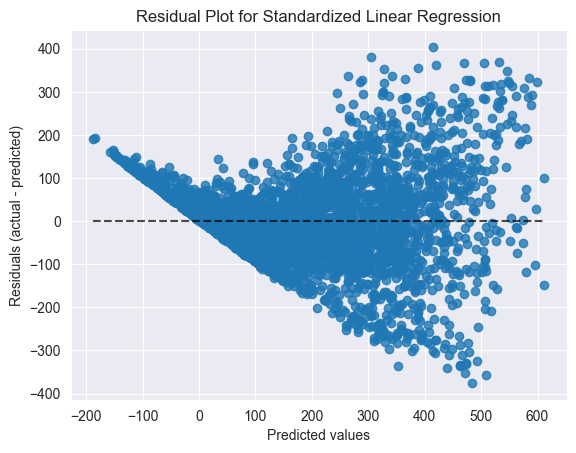

In [173]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.title("Residual Plot for Standardized Linear Regression")
plt.savefig("residual_plot_std_lr.png")
plt.show()

In [174]:
zipp = zip(X.columns, np.round(np.abs(lr.coef_),2))
zipp_df = pd.DataFrame(zipp)

zipp_df.sort_values(by=1, ascending=False).head(10)

,0,1
50,workingday_0,2.795525e+13
51,workingday_1,1.971674e+13
44,weekday_1,1.791539e+13
45,weekday_2,1.791539e+13
47,weekday_4,1.791539e+13
46,weekday_3,1.791539e+13
48,weekday_5,1.791539e+13
42,holiday_1,1.531244e+13
54,weathersit_3,9.898544e+12
53,weathersit_2,9.898544e+12


### Regularization

In [175]:
parameters = {'alpha': np.logspace(-2, 1, base=10)}

lasso_grid = GridSearchCV(Lasso(), parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, refit=True)
lasso_grid.fit(X_train, y_train)

print(f'Best regularization parameter for Lasso was {lasso_grid.best_params_['alpha']:.4f} with RMSE score {np.sqrt(np.abs(lasso_grid.best_score_)):.4f}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best regularization parameter for Lasso was 0.0133 with RMSE score 102.1307


In [176]:
lasso_regr = Lasso(**lasso_grid.best_params_)
lasso_regr.fit(X_train, y_train)
y_pred = lasso_regr.predict(X_test)

In [177]:
rmse_score_lasso = rmse(y_test, y_pred)

print(f'Root mean squared error score: {rmse_score_lasso:.3f}')

Root mean squared error score: 102.349


In [178]:
r2_score_lasso = r2_score(y_test, y_pred)

print(f'R2 score: {r2_score_lasso:.3f}')

R2 score: 0.677


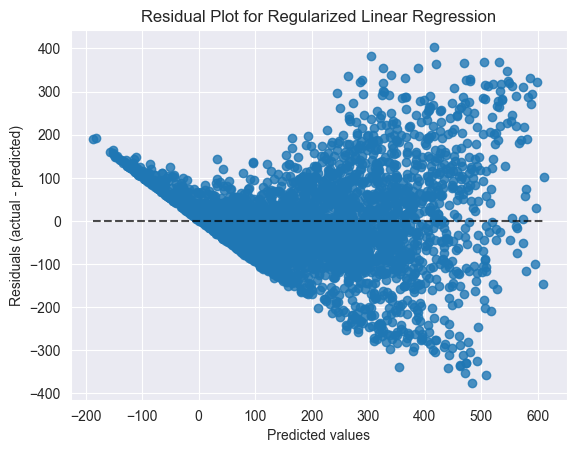

In [179]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.title("Residual Plot for Regularized Linear Regression")
plt.savefig("residual_plot_rlr.png")
plt.show()

In [180]:
zipp = zip(X.columns, np.round(np.abs(lasso_regr.coef_),2))
zipp_df = pd.DataFrame(zipp)

zipp_df.sort_values(by=1, ascending=False).head(10)

,0,1
2,atemp,236.38
22,hr_17,228.81
9,hr_4,196.64
8,hr_3,194.61
23,hr_18,191.21
7,hr_2,183.52
10,hr_5,180.76
6,hr_1,170.72
13,hr_8,165.03
5,hr_0,156.91


## SVM

In [181]:
# svm = SVC()
# 
# parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 0.01, 0.001, 1.0]}
# 
# svc_grid_search = GridSearchCV(svm, parameters, cv=5, scoring='neg_mean_squared_error', verbose=1, refit=True)
# svc_grid_search.fit(X_train, y_train)
# 
# print(f'Best parameters were: {svc_grid_search.best_params_} with score: {svc_grid_search.best_score_}')

Best parameters were: {'C': 1.0, 'kernel': 'linear'} with score: 99.390 \
No real improvement, compared to using default values for SVM

In [182]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [183]:
rmse_score_svm = rmse(y_test, y_pred)

print(f'Root mean squared error score: {rmse_score_svm:.3f}')

Root mean squared error score: 97.471


In [184]:
r2_score_svm = r2_score(y_test, y_pred)

print(f'R2 score: {r2_score_svm:.3f}')

R2 score: 0.707


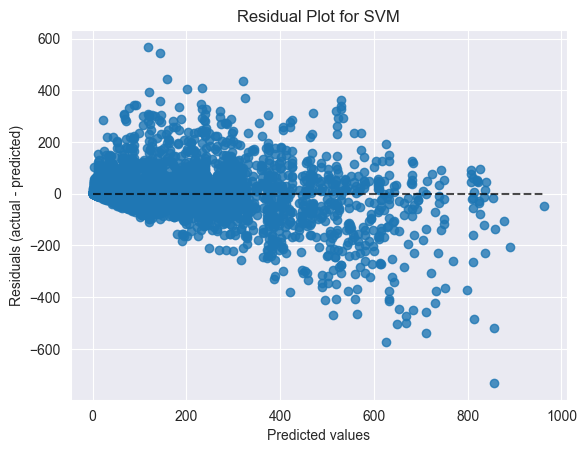

In [185]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.title("Residual Plot for SVM")
plt.savefig("residual_plot_svm.png")
plt.show()

## Random Forest

In [186]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [187]:
rmse_score_rf = rmse(y_test, y_pred)

print(f'Root mean squared error score: {rmse_score_rf:.3f}')

Root mean squared error score: 48.075


In [188]:
r2_score_rf = r2_score(y_test, y_pred)

print(f'R2 score: {r2_score_rf:.3f}')

R2 score: 0.929


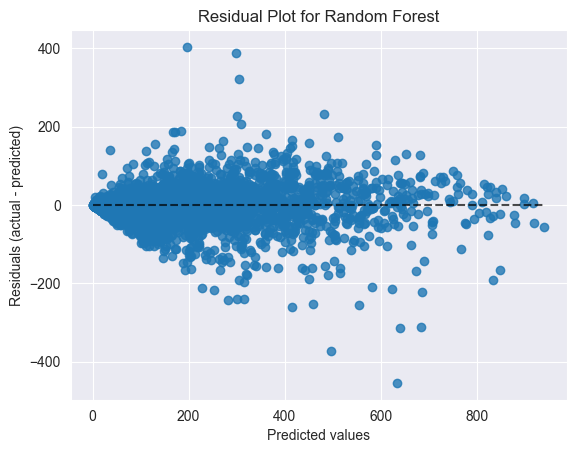

In [189]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.title("Residual Plot for Random Forest")
plt.savefig("residual_plot_rf.png")
plt.show()

In [190]:
zipp = zip(X.columns, np.round(np.abs(rf.feature_importances_),2))
zipp_df = pd.DataFrame(zipp)
zipp_df.sort_values(by=1, ascending=False).head(10)

,0,1
2,atemp,0.21
22,hr_17,0.09
3,hum,0.08
1,yr,0.08
23,hr_18,0.08
13,hr_8,0.06
50,workingday_0,0.05
51,workingday_1,0.05
0,season,0.03
24,hr_19,0.03


## Neural Network

In [191]:
X_train_tensor = X_train.astype({col: 'float32' for col in X_train.select_dtypes('bool').columns})
X_test_tensor = X_test.astype({col: 'float32' for col in X_test.select_dtypes('bool').columns})
y_train_tensor = y_train.values
y_test_tensor = y_test.values

scaler = StandardScaler()
X_train_tensor = scaler.fit_transform(X_train_tensor)
X_test_tensor = scaler.transform(X_test_tensor)

X_train_tensor = torch.tensor(X_train_tensor, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_tensor, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_tensor, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test_tensor, dtype=torch.float32).view(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X_train_tensor, y_train_tensor, test_size=0.2, random_state=42)

class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  
        self.fc2 = nn.Linear(64, 32)         
        self.fc3 = nn.Linear(32, 16)        
        self.fc4 = nn.Linear(16, 1)          

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  
        return x

input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)

criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 77
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


train_losses = []
val_losses = []

for epoch in tqdm(range(num_epochs)):
    model.train()  
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  
        predictions = model(X_batch)  
        loss = criterion(predictions, y_batch)  
        loss.backward()  
        optimizer.step()  

        epoch_loss += loss.item()

    train_loss = epoch_loss / len(train_loader)
    train_losses.append(np.log(train_loss))

    model.eval()  
    with torch.no_grad():
        val_predictions = model(X_val)  
        val_loss = criterion(val_predictions, y_val)  
        val_losses.append(np.log(val_loss.item()))

    tqdm.write(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_score = np.sqrt(criterion(y_pred, y_test_tensor).item())
    y_pred = y_pred.numpy()
    print(f'Test RMSE: {test_score:.4f}')

# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.title('Training and Validation Losses')
# plt.xlabel('Epochs')
# plt.ylabel('Log Loss')
# print(f"Best Epoch Count {np.argmin(val_losses)}")
# plt.axvline(x=np.argmin(val_losses), color='red', linestyle='--', label='Overfitting Point')  # Example overfitting point
# plt.legend()
# plt.grid(True)
# plt.savefig('Training_validation_losses.png')
# plt.show()

  1%|▏         | 1/77 [00:00<00:40,  1.89it/s]

Train Loss: 31074.6817, Val Loss: 7547.2109


  3%|▎         | 2/77 [00:00<00:36,  2.06it/s]

Train Loss: 6495.4096, Val Loss: 5758.7476


  4%|▍         | 3/77 [00:01<00:35,  2.11it/s]

Train Loss: 4963.7509, Val Loss: 4332.9653


  5%|▌         | 4/77 [00:01<00:34,  2.15it/s]

Train Loss: 3979.4033, Val Loss: 3559.7896


  6%|▋         | 5/77 [00:02<00:33,  2.16it/s]

Train Loss: 3401.8345, Val Loss: 3207.2673


  8%|▊         | 6/77 [00:02<00:32,  2.16it/s]

Train Loss: 3040.3006, Val Loss: 2824.1462


  9%|▉         | 7/77 [00:03<00:32,  2.17it/s]

Train Loss: 2815.3718, Val Loss: 2693.1240


 10%|█         | 8/77 [00:03<00:31,  2.18it/s]

Train Loss: 2672.5746, Val Loss: 2581.6318


 12%|█▏        | 9/77 [00:04<00:31,  2.18it/s]

Train Loss: 2546.8208, Val Loss: 2566.1536


 13%|█▎        | 10/77 [00:04<00:31,  2.15it/s]

Train Loss: 2456.4246, Val Loss: 2454.7493


 14%|█▍        | 11/77 [00:05<00:31,  2.11it/s]

Train Loss: 2395.5455, Val Loss: 2417.8083


 16%|█▌        | 12/77 [00:05<00:30,  2.14it/s]

Train Loss: 2327.4836, Val Loss: 2356.7725


 17%|█▋        | 13/77 [00:06<00:29,  2.16it/s]

Train Loss: 2267.6714, Val Loss: 2325.7905


 18%|█▊        | 14/77 [00:06<00:28,  2.19it/s]

Train Loss: 2200.5429, Val Loss: 2272.6189


 19%|█▉        | 15/77 [00:06<00:28,  2.19it/s]

Train Loss: 2164.3318, Val Loss: 2367.9385


 21%|██        | 16/77 [00:07<00:27,  2.19it/s]

Train Loss: 2106.8159, Val Loss: 2278.7263


 22%|██▏       | 17/77 [00:07<00:27,  2.19it/s]

Train Loss: 2059.1949, Val Loss: 2190.3884


 23%|██▎       | 18/77 [00:08<00:26,  2.20it/s]

Train Loss: 2007.1916, Val Loss: 2128.1975


 25%|██▍       | 19/77 [00:08<00:26,  2.20it/s]

Train Loss: 1957.1716, Val Loss: 2139.7651


 26%|██▌       | 20/77 [00:09<00:25,  2.21it/s]

Train Loss: 1924.7771, Val Loss: 2086.4983


 27%|██▋       | 21/77 [00:09<00:25,  2.22it/s]

Train Loss: 1883.4544, Val Loss: 2062.7764


 29%|██▊       | 22/77 [00:10<00:24,  2.23it/s]

Train Loss: 1840.4992, Val Loss: 2033.2306


 30%|██▉       | 23/77 [00:10<00:24,  2.23it/s]

Train Loss: 1793.7904, Val Loss: 2048.6296


 31%|███       | 24/77 [00:11<00:23,  2.23it/s]

Train Loss: 1766.7627, Val Loss: 1999.7306


 32%|███▏      | 25/77 [00:11<00:23,  2.21it/s]

Train Loss: 1718.7035, Val Loss: 1996.9880


 34%|███▍      | 26/77 [00:11<00:23,  2.21it/s]

Train Loss: 1713.7368, Val Loss: 2079.2742


 35%|███▌      | 27/77 [00:12<00:22,  2.20it/s]

Train Loss: 1684.3756, Val Loss: 1939.4564


 36%|███▋      | 28/77 [00:12<00:22,  2.20it/s]

Train Loss: 1644.2582, Val Loss: 1928.6265


 38%|███▊      | 29/77 [00:13<00:21,  2.21it/s]

Train Loss: 1630.6613, Val Loss: 1888.6458


 39%|███▉      | 30/77 [00:13<00:21,  2.22it/s]

Train Loss: 1608.0126, Val Loss: 1903.9137


 40%|████      | 31/77 [00:14<00:20,  2.22it/s]

Train Loss: 1586.6969, Val Loss: 1890.5936


 42%|████▏     | 32/77 [00:14<00:20,  2.22it/s]

Train Loss: 1566.1554, Val Loss: 1845.9963


 43%|████▎     | 33/77 [00:15<00:20,  2.15it/s]

Train Loss: 1572.5378, Val Loss: 1946.8248


 44%|████▍     | 34/77 [00:15<00:21,  2.03it/s]

Train Loss: 1534.3772, Val Loss: 1895.5709


 45%|████▌     | 35/77 [00:16<00:20,  2.08it/s]

Train Loss: 1505.7445, Val Loss: 1851.0302


 47%|████▋     | 36/77 [00:16<00:19,  2.11it/s]

Train Loss: 1508.0912, Val Loss: 1859.6453


 48%|████▊     | 37/77 [00:17<00:18,  2.14it/s]

Train Loss: 1479.6125, Val Loss: 1815.0524


 49%|████▉     | 38/77 [00:17<00:18,  2.15it/s]

Train Loss: 1465.9435, Val Loss: 1791.6985


 51%|█████     | 39/77 [00:17<00:17,  2.16it/s]

Train Loss: 1450.3518, Val Loss: 1915.6785


 52%|█████▏    | 40/77 [00:18<00:16,  2.18it/s]

Train Loss: 1432.5742, Val Loss: 1792.3070


 53%|█████▎    | 41/77 [00:18<00:16,  2.18it/s]

Train Loss: 1427.0532, Val Loss: 1805.1139


 55%|█████▍    | 42/77 [00:19<00:16,  2.18it/s]

Train Loss: 1407.6604, Val Loss: 1809.1796


 56%|█████▌    | 43/77 [00:19<00:15,  2.19it/s]

Train Loss: 1390.4908, Val Loss: 1760.8361


 57%|█████▋    | 44/77 [00:20<00:15,  2.20it/s]

Train Loss: 1374.7075, Val Loss: 1814.3202


 58%|█████▊    | 45/77 [00:20<00:14,  2.20it/s]

Train Loss: 1365.7089, Val Loss: 1817.5929


 60%|█████▉    | 46/77 [00:21<00:14,  2.20it/s]

Train Loss: 1342.3039, Val Loss: 1794.1537


 61%|██████    | 47/77 [00:21<00:13,  2.19it/s]

Train Loss: 1333.8382, Val Loss: 1867.1132


 62%|██████▏   | 48/77 [00:22<00:13,  2.20it/s]

Train Loss: 1338.3429, Val Loss: 1761.7128


 64%|██████▎   | 49/77 [00:22<00:12,  2.20it/s]

Train Loss: 1313.5254, Val Loss: 1753.9839


 65%|██████▍   | 50/77 [00:22<00:12,  2.18it/s]

Train Loss: 1298.1215, Val Loss: 1743.7225


 66%|██████▌   | 51/77 [00:23<00:11,  2.19it/s]

Train Loss: 1286.9026, Val Loss: 1788.7495


 68%|██████▊   | 52/77 [00:23<00:11,  2.19it/s]

Train Loss: 1275.0548, Val Loss: 1807.6359


 69%|██████▉   | 53/77 [00:24<00:10,  2.20it/s]

Train Loss: 1267.7919, Val Loss: 1715.5006


 70%|███████   | 54/77 [00:24<00:10,  2.20it/s]

Train Loss: 1274.2844, Val Loss: 1737.1162


 71%|███████▏  | 55/77 [00:25<00:10,  2.19it/s]

Train Loss: 1260.6507, Val Loss: 1707.1261


 73%|███████▎  | 56/77 [00:25<00:09,  2.21it/s]

Train Loss: 1235.6416, Val Loss: 1664.1136


 74%|███████▍  | 57/77 [00:26<00:09,  2.18it/s]

Train Loss: 1212.9978, Val Loss: 1736.4065


 75%|███████▌  | 58/77 [00:26<00:08,  2.19it/s]

Train Loss: 1219.3759, Val Loss: 1753.1587


 77%|███████▋  | 59/77 [00:27<00:08,  2.20it/s]

Train Loss: 1206.4509, Val Loss: 1663.1854


 78%|███████▊  | 60/77 [00:27<00:07,  2.20it/s]

Train Loss: 1193.9270, Val Loss: 1726.1697


 79%|███████▉  | 61/77 [00:27<00:07,  2.20it/s]

Train Loss: 1196.1075, Val Loss: 1725.2188


 81%|████████  | 62/77 [00:28<00:06,  2.20it/s]

Train Loss: 1189.4109, Val Loss: 1675.2153


 82%|████████▏ | 63/77 [00:28<00:06,  2.20it/s]

Train Loss: 1181.3228, Val Loss: 1785.4961


 83%|████████▎ | 64/77 [00:29<00:05,  2.20it/s]

Train Loss: 1176.5143, Val Loss: 1702.5601


 84%|████████▍ | 65/77 [00:29<00:05,  2.20it/s]

Train Loss: 1158.1785, Val Loss: 1679.2750


 86%|████████▌ | 66/77 [00:30<00:05,  2.17it/s]

Train Loss: 1156.2369, Val Loss: 1679.4012


 87%|████████▋ | 67/77 [00:30<00:04,  2.18it/s]

Train Loss: 1156.9851, Val Loss: 1673.5984


 88%|████████▊ | 68/77 [00:31<00:04,  2.20it/s]

Train Loss: 1143.7795, Val Loss: 1700.1067


 90%|████████▉ | 69/77 [00:31<00:03,  2.20it/s]

Train Loss: 1147.9811, Val Loss: 1645.0205


 91%|█████████ | 70/77 [00:32<00:03,  2.21it/s]

Train Loss: 1155.9400, Val Loss: 1645.4453


 92%|█████████▏| 71/77 [00:32<00:02,  2.21it/s]

Train Loss: 1112.3961, Val Loss: 1728.3887


 94%|█████████▎| 72/77 [00:32<00:02,  2.20it/s]

Train Loss: 1110.6330, Val Loss: 1662.4899


 95%|█████████▍| 73/77 [00:33<00:01,  2.21it/s]

Train Loss: 1096.2279, Val Loss: 1654.6930


 96%|█████████▌| 74/77 [00:33<00:01,  2.20it/s]

Train Loss: 1119.1970, Val Loss: 1651.6110


 97%|█████████▋| 75/77 [00:34<00:00,  2.20it/s]

Train Loss: 1096.8226, Val Loss: 1696.6738


 99%|█████████▊| 76/77 [00:34<00:00,  2.21it/s]

Train Loss: 1098.3901, Val Loss: 1667.8755


100%|██████████| 77/77 [00:35<00:00,  2.18it/s]

Train Loss: 1093.6220, Val Loss: 1641.3292
Test RMSE: 41.0325


In [192]:
y_pred = y_pred.flatten()

In [193]:
r2_score_nn = r2_score(y_test, y_pred)
rmse_score_nn = rmse(y_test, y_pred)

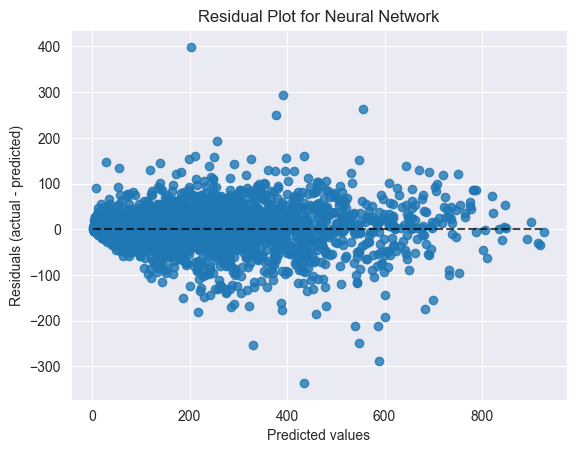

In [194]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.title("Residual Plot for Neural Network")
# plt.savefig("residual_plot_nn.png")
plt.show()

In [195]:
models_performance = {}

linear_regression = {"R2 Score": r2_score_lr, "MSE": rmse_score_lr}
regular_linear_regression = {"R2 Score": r2_score_lasso, "MSE": rmse_score_lasso}
svm = {"R2 Score": r2_score_svm, "MSE": rmse_score_svm}
random_forest = {"R2 Score": r2_score_rf, "MSE": rmse_score_rf}
neural_network = {"R2 Score": r2_score_nn, "MSE": rmse_score_nn}


models_performance["Linear Regression"] = linear_regression
models_performance["Regularized Linear Regression"] = regular_linear_regression
models_performance["SVM"] = svm
models_performance["Random Forest"] = random_forest
models_performance["Neural Network"] = neural_network

In [196]:
print(models_performance)

{'Linear Regression': {'R2 Score': 0.6770828840166011, 'MSE': np.float64(102.35820632911445)}, 'Regularized Linear Regression': {'R2 Score': 0.677142481692271, 'MSE': np.float64(102.34876026327315)}, 'SVM': {'R2 Score': 0.7071798411186565, 'MSE': np.float64(97.47149345546336)}, 'Random Forest': {'R2 Score': 0.9287664632774563, 'MSE': np.float64(48.07501053989808)}, 'Neural Network': {'R2 Score': 0.9481078386306763, 'MSE': np.float64(41.03251423804878)}}


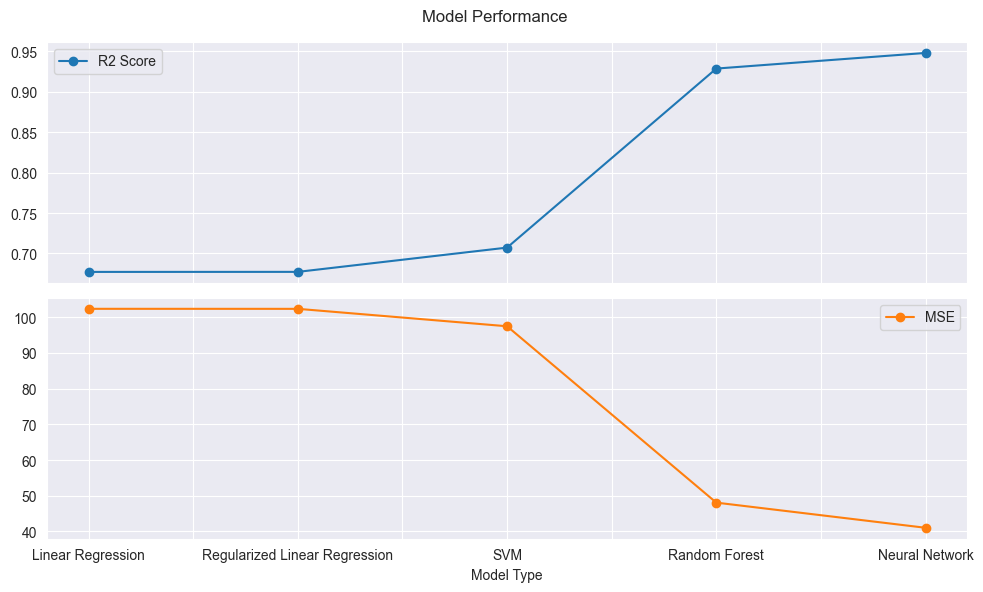

In [197]:
df = pd.DataFrame(models_performance).T

ax = df.plot(kind="line", figsize=(10, 6), subplots=True, title = "Model Performance", grid=True, xlabel='Model Type', marker='o')

plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("model_performance.png")
plt.show()